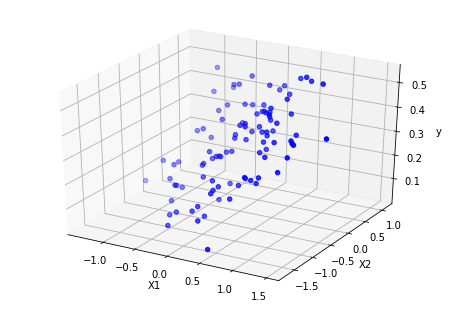

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d.axes3d import Axes3D 
from matplotlib import cm 

num_points = 100
data = []
for i in range(num_points):
    x1 = np.random.normal(0.,0.55)
    x2 = np.random.normal(0.,0.55)
    y1 = x1 * 0.1 + x2 * 0.2 + 0.3 + np.random.normal(0.0,0.03)
    data.append([x1,x2,y1])
data = np.array(data)
X = data[:,[0,1]]
y = data[:,2]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],y,c='b')
ax.set_zlabel('y') #坐标轴
ax.set_ylabel('X2')
ax.set_xlabel('X1')
plt.show() 

   

In [5]:
data[:10]

array([[ 0.35291809,  0.16468428,  0.35774628],
       [-0.55106013, -0.10981663,  0.25468008],
       [-0.65439632, -0.71406955,  0.1061582 ],
       [-0.19790689,  0.61536205,  0.43122894],
       [-0.00171825,  0.66827656,  0.44198075],
       [-0.2739687 , -1.16342739,  0.01195186],
       [ 0.11592071, -0.18320789,  0.29397728],
       [-0.02707248, -0.53269863,  0.21784183],
       [ 0.7321352 ,  0.27868019,  0.42643361],
       [-0.76680149, -0.89838545,  0.06411818]])

In [2]:

b = np.array([1])
b=b.repeat(100)
X = np.column_stack((b,X))

In [36]:
'直接求解方法'
from numpy.linalg import linalg as la
xtx = X.transpose().dot(X)
xtx = la.inv(xtx)
theta = xtx.dot(X.transpose()).dot(y)
theta

'得到的权重参数如下所示：'
' x0 = 0.29'
' x1 = 0.10'
' x2 = 0.20'

array([ 0.29348374,  0.10224818,  0.19596799])

In [ ]:
'梯度下降法求解权重参数'
'model'
'cost'
'gradient'
'theta update'
'stop stratege'

In [3]:

'model'
def model(theta,X):
    theta = np.array(theta)
    return X.dot(theta)

'cost'
def cost(m,theta,X,y):
    'print(theta)'
    ele = y - model(theta,X)
    item = ele**2
    item_sum = np.sum(item)
    return item_sum/2/m
    

'gradient'
def gradient(m,theta,X,y,cols):
    grad_theta = []
    for j in range(cols):
        grad = (y-model(theta,X)).dot(X[:,j])
        grad_sum = np.sum(grad)    
        grad_theta.append(-grad_sum/m)
    return np.array(grad_theta)

'theta update'
def theta_update(grad_theta,theta,sigma):
    return theta - sigma * grad_theta

'stop stratege'
def stop_stratege(cost,cost_update,threshold):
    return cost-cost_update < threshold

def OLS(X,y,threshold):
    start = time.clock()
    '样本个数'
    m=100
    '设置权重参数的初始值'
    theta = [0,0,0]
    '迭代步数'
    iters = 0;
    '记录代价函数的值'
    cost_record=[]
    '学习率'
    sigma = 0.0001
    cost_val = cost(m,theta,X,y)
    'print("cost_val=%f" % cost_val)'
    cost_record.append(cost_val)
    while True:
        grad = gradient(m,theta,X,y,3)
        '参数更新'
        theta = theta_update(grad,theta,sigma)
        cost_update = cost(m,theta,X,y)
        'print("cost_update=%f" %cost_update)'
        if stop_stratege(cost_val,cost_update,threshold):
            break
        iters=iters+1
        cost_val = cost_update
        cost_record.append(cost_val)
    end = time.clock()
    print("OLS convergence duration: %f s" % (end - start))
    return cost_record, iters,theta

def draw(fig,theta):
    x = fig.add_subplot(1, 1, 1, projection='3d') 
    x1=np.arange(1,10,1) 
    x2=np.arange(1,20,1) 
    x1, x2 = np.meshgrid(x1, x2) 
    Z = theta[0] + theta[1]*x1 + theta[2]*x2
    surf = ax.plot_surface(x1, x1, Z, rstride=1, cstride=1,cmap=cm.jet,linewidth=0, antialiased=False) 
    ax.set_zlim3d(0,1000) 
    fig.colorbar(surf, shrink=0.5, aspect=5) 
    print("draw done")
    return plt

In [6]:
costs, iters,theta = OLS(X,y,0.000000001)

OLS convergence duration: 7.456927 s


In [7]:
theta

array([ 0.29921652,  0.09754371,  0.1867609 ])

array([ 0.29238909,  0.08631702,  0.16770929])

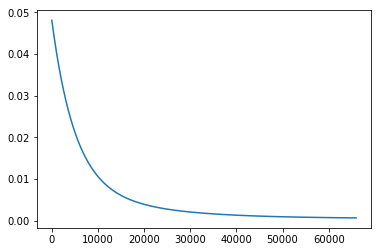

In [63]:
plt.plot(costs)
plt.show()

In [81]:
plt = draw(fig,theta)
plt.show()

draw done
